<h3 style='Background:purple; border:0; color:white'><center>Neural Network</center></h3>

![](http://brainstormingbox.org/wp-content/uploads/2020/12/A-Beginners-Guide-to-Neural-Networks.jpeg)

<a id="top"></a>

<div class="list-group" id="list-tab" role="tablist">
<h3 class="list-group-item list-group-item-action active" data-toggle="list" style='color:white; background:crimson; border:0' role="tab" aria-controls="home"><center>Navigation</center></h3>

* [**Libraries**](#10)
* [**Scaling**](#20)
* [**ANN CLASS**](#30)
* [**Testing Neural Network**](#40)
* [**Training**](#50)
  * [**Gradient descent**](#51)
  * [**Back Propagation**](#52)
  * [**Numerical Gradient Checking**](#53)

<a id=10></a>
<h4 style='border:0; background:crimson; color:white'><center>Libraries</center></h4>

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import plotly as plot
from scipy.stats import norm

<a id="20"></a>
<h3>Creating an array</h3>

In [40]:
X = np.array(([3,5], [5,1], [10,2]), dtype=float)
Y = np.array(([75], [82], [93]), dtype=float)

In [41]:
X

array([[ 3.,  5.],
       [ 5.,  1.],
       [10.,  2.]])

In [42]:
Y

array([[75.],
       [82.],
       [93.]])

For this example we're using it to train a model to predict how 
well you're going to do in exams based on how well you slept and 
how much you've studied. 
<br></br>
**So this is a supervised Regression Model**
<br>
It's regression because we're predicting test score 
which is the continues output 

<a id=20></a>
<h4 style='border:0; background:crimson; color:white'><center>Scaling</center></h4>
<blockquote> Both our data input is in hours, however, the output</blockquote>
<blockquote> is test score which is between 0 and 100. So we have</blockquote> 
<blockquote> to scale our data. Since our data is positive we can</blockquote>
<blockquote> scale our data to max</blockquote>

In [43]:
X = X/np.amax(X, axis=0) #Return the maximum of an array or maximum along an axis.
Y = Y/100 #since maximum value is 100 deviding it by 100 we get range between 0-1

In [44]:
X

array([[0.3, 1. ],
       [0.5, 0.2],
       [1. , 0.4]])

In [45]:
Y

array([[0.75],
       [0.82],
       [0.93]])

<a id=30></a>
<h4 style='Background:crimson; color:white; border:0'><center>ANN CLASS</center></h4>

In [46]:
class ANN(object):
    def __init__(self):
        #define hyperParameters
        self.inputLayerSize=2
        self.outputLayerSize=1
        self.hiddenLayerSize=3
        
        #weight first we give random size
        self.W1 = np.random.randn(self.inputLayerSize, self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize, self.outputLayerSize)
        
    def forward(self, X):
        #propagate
        self.z2=np.dot(X, self.W1) #dot product of weight and input
        self.a2=self.sigmoid(self.z2) #convert to [0:1]
        self.z3 = np.dot(self.a2, self.W2) #dot product of weight and rando
        yHat=self.sigmoid(self.z3) #return range [0:1]
        return yHat
    
    def sigmoid(self, z):
        # return array range [0:1]
        return 1/(1+np.exp(-z))
    
    def sigmoidPrime(self, z):
        #return derivative of sigmoid
        return np.exp(-z)/((1+np.exp(-z))**2)

<h3>Activation Function</h3>
<blockquote>Sigmoid: return range between [0:1]</blockquote>

In [47]:
def test_sigmoid(z):
    return 1/(1+np.exp(-z))

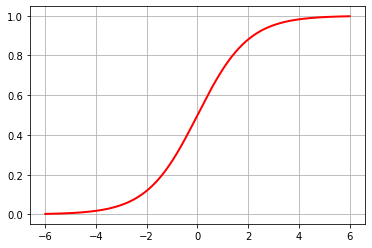

In [48]:
testInput = np.arange(-6,6,0.001)
plt.plot(testInput, test_sigmoid(testInput), linewidth = 2, color = "r")
plt.grid(1)

> Sigmoid prime test

In [49]:
def test_sigmoidPrime(z):
    return np.exp(-z)/((1+np.exp(-z))**2)

In [50]:
# Creating testing data to plot sigmoid prime
a,b,c = (np.random.randint(-10,10),np.random.randint(-10,10),np.random.randint(-10,10))
testValues = np.arange(-5,5,0.01)

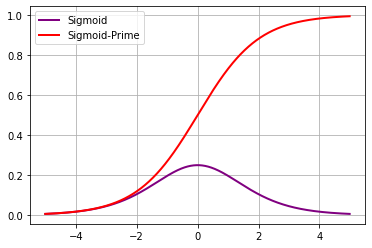

In [51]:
plt.plot(testValues, test_sigmoidPrime(testValues), linewidth=2, color='purple')
plt.plot(testValues, test_sigmoid(testValues), linewidth=2, color='red')
plt.grid(1)
plt.legend(['Sigmoid','Sigmoid-Prime'])

<a id=40></a>
<h4 style='background:crimson; border:0; color:white'><center>Testing Neural Network</center></h4>

In [52]:
ann =ANN()

In [53]:
yHat=ann.forward(X)

Prediction

In [54]:
yHat

array([[0.64334374],
       [0.60296528],
       [0.61621347]])

Actual

In [55]:
Y

array([[0.75],
       [0.82],
       [0.93]])

<a id=50></a>
<h4 style='background:crimson; border:0; color:white'><center>Training</center></h4>

to improve our model we need to know how far we're from our target
we will use cost function which allows us to know how wrong our model is,
one of those functions take each error value square it and add them all together 
similar to the sum squared error function

---

Training is minimizing the cost function, training the model which minimize the cost by changing the weights which we multiply with the inputs.

---

<a id=51></a>
<h4><center>GRADIENT DESCENT</center></h4>

>By taking the ratio of rate of change of cost with respect to weight 
>we get the gradient descent which is basically derivative of cost with respect
>to weight. This will allow us to know whether the ratio is positive or negative >thus knowing which direction our learning is leaning towards. since we know >which direction the cost decreases we already have half the process. making it >incredibly faster. We need our data to be convex however for it to work

---

<a id=52></a>
<h4><center>Back Propagation</center></h4>
<ul>
<li>It's back propagating the error to each weight</li>
<li>The weight that contributes more to the error will have larger Activation</li>
<li>The updated weight will then be the focus and will change more in later runs</li>
</ul>

In [56]:
def costFunction(self, X, Y):
    #Compute cost for given X,Y use weights already stored in class.
    self.yHat = self.forward(X)
    J = 0.5*sum((Y-self.yHat)**2)
    return J

In [57]:
ANN.costFunction = costFunction

In [58]:
def costFunctionPrime(self, X, Y):
    #compute derivative with respect to W1 & W2
    self.yHat = self.forward(X)
    
    delta3 = np.multiply(-(Y-self.yHat), self.sigmoidPrime(self.z3))
    dJdW2 = np.dot(self.a2.T, delta3) #derivative of cost with respect to weight
    
    delta2 = np.dot(delta3, self.W2.T)*self.sigmoidPrime(self.z2)
    dJdW1 = np.dot(X.T, delta2)
    
    return dJdW1, dJdW2

add method to ANN class

In [59]:
ANN.costFunctionPrime = costFunctionPrime

Computing cost, how should we change weight to compute the cost?

In [60]:
ann2 = ANN()

In [61]:
cost1 = ann2.costFunction(X,Y)

In [62]:
dJdW1, dJdW2 = ann2.costFunctionPrime(X,Y)

In [63]:
dJdW1

array([[ 0.02819563, -0.0046872 ,  0.02423398],
       [ 0.02098273, -0.00261103,  0.01333277]])

In [64]:
dJdW2

array([[-0.18156013],
       [-0.17150477],
       [-0.11428475]])

>If we move this way by adding a scalar times our derivative to our weights, our cost will increase, and if we do the opposite, subtract our gradient from our weights, we will move downhill and reduce our cost. This simple step downhill is the core of gradient descent and a key part of how even very sophisticated learning algorithms are trained.

In [65]:
scalar = 3
#updating parameters
ann2.W1 = ann2.W1 + scalar*dJdW1 #add a scalar value multiplied by cost
ann2.W2 = ann2.W2 + scalar*dJdW2 
cost2 = ann2.costFunction(X,Y)

In [66]:
print(cost1, cost2)

[0.31115041] [0.55754091]


In [67]:
dJdW1, dJdW2 = ann2.costFunctionPrime(X,Y)
ann2.W1 = scalar*dJdW1
ann2.W2 = scalar*dJdW2
cost3 = ann2.costFunctionPrime(X,Y)

In [68]:
print(cost2,cost3)

[0.55754091] (array([[0.02975207, 0.02908036, 0.01837556],
       [0.02330139, 0.02277469, 0.01439712]]), array([[-0.18126127],
       [-0.17202348],
       [-0.1767288 ]]))


<a id=53></a>
<h4><center>Numerical Gradient Check</center></h4>

In [69]:
#helper function
def getParams(self):
    #Get W1 and W2 unrolled into vector
    params = np.concatenate((self.W1.ravel(), self.W2.ravel()))
    #Join a sequence of arrays along an existing axis.
    return params

def setParams(self, params):
    #set W1 and W2 using single parameters
    W1_start = 0
    W1_end = self.hiddenLayerSize * self.inputLayerSize 
    self.W1 = np.reshape(params[W1_start:W1_end], (self.inputLayerSize, self.hiddenLayerSize))
    W2_end = W1_end + self.hiddenLayerSize*self.outputLayerSize
    self.W2 = np.reshape(params[W1_end:W2_end], (self.hiddenLayerSize, self.outputLayerSize))
    
def computeGradients(self, X, Y):
    dJdW1, dJdW2 = self.costFunctionPrime(X,Y)
    return np.concatenate((dJdW1.ravel(), dJdW2.ravel()))


In [70]:
ANN.getParams = getParams
ANN.setParams = setParams
ANN.computeGradients = computeGradients

We can use the same approach to numerically evaluate the gradient of our neural network. It’s a little more complicated this time, since we have 9 gradient values, and we’re interested in the gradient of our cost function. We’ll make things simpler by testing one gradient at a time. We’ll “perturb” each weight - adding epsilon to the current value and computing the cost function, subtracting epsilon from the current value and computing the cost function, and then computing the slope between these two values.

In [71]:
def computeNumericalGradient(N, X, y):
        paramsInitial = N.getParams()
        numgrad = np.zeros(paramsInitial.shape)
        perturb = np.zeros(paramsInitial.shape)
        e = 1e-4

        for p in range(len(paramsInitial)):
            #Set perturbation vector
            perturb[p] = e
            N.setParams(paramsInitial + perturb)
            loss2 = N.costFunction(X, y)
            
            N.setParams(paramsInitial - perturb)
            loss1 = N.costFunction(X, y)

            #Compute Numerical Gradient
            numgrad[p] = (loss2 - loss1) / (2*e)

            #Return the value we changed to zero:
            perturb[p] = 0
            
        #Return Params to original value:
        N.setParams(paramsInitial)

        return numgrad 

We’ll repeat this process across all our weights, and when we’re done we’ll have a numerical gradient vector, with the same number of values as we have weights. It’s this vector we would like to compare to our official gradient calculation. We see that our vectors appear very similar, which is a good sign, but we need to quantify just how similar they are.

In [72]:
ann3 = ANN()

In [73]:
numgrad=computeNumericalGradient(ann3, X, Y)

In [74]:
numgrad

array([ 0.03335025,  0.04344046, -0.0255198 ,  0.03558851,  0.03393527,
       -0.01757034, -0.08959467, -0.12233894, -0.21572182])

In [75]:
grad = ann3.computeGradients(X,Y)
grad

array([ 0.03335025,  0.04344046, -0.0255198 ,  0.03558851,  0.03393527,
       -0.01757034, -0.08959467, -0.12233894, -0.21572182])